## Time Series Analysis

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
 


In [2]:
benin = pd.read_csv("/Users/Suraphel/Desktop/Week-0/Optimal-Solar-Investment-Analysis/notebooks/benin.csv")
sierraleone = pd.read_csv("/Users/Suraphel/Desktop/Week-0/Optimal-Solar-Investment-Analysis/notebooks/sierraleone.csv")
togo = pd.read_csv("/Users/Suraphel/Desktop/Week-0/Optimal-Solar-Investment-Analysis/notebooks/togo.csv")

In [3]:
togo.head()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-25 00:01,-1.3,0.0,0.0,0.0,0.0,24.8,94.5,0.9,1.1,0.4,227.6,1.1,977,0,0.0,24.7,24.4,NaN
1,2021-10-25 00:02,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.1,1.6,0.4,229.3,0.7,977,0,0.0,24.7,24.4,NaN
2,2021-10-25 00:03,-1.3,0.0,0.0,0.0,0.0,24.8,94.4,1.2,1.4,0.3,228.5,2.9,977,0,0.0,24.7,24.4,NaN
3,2021-10-25 00:04,-1.2,0.0,0.0,0.0,0.0,24.8,94.3,1.2,1.6,0.3,229.1,4.6,977,0,0.0,24.7,24.4,NaN
4,2021-10-25 00:05,-1.2,0.0,0.0,0.0,0.0,24.8,94.0,1.3,1.6,0.4,227.5,1.6,977,0,0.0,24.7,24.4,NaN


In [4]:
# Convert the 'Date' column to datetime
benin['Timestamp'] = pd.to_datetime(benin['Timestamp'])
sierraleone['Timestamp'] = pd.to_datetime(sierraleone['Timestamp'])
togo['Timestamp'] = pd.to_datetime(togo['Timestamp'])

# Set the 'Date' column as the index
benin.set_index('Timestamp', inplace=True)
sierraleone.set_index('Timestamp', inplace=True)
togo.set_index('Timestamp', inplace=True)

In [5]:
# Plotting function
def plot_time_series(data, columns, title):
    plt.figure(figsize=(14, 7))
    for column in columns:
        plt.plot(data.index, data[column], label=column)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

# Evaluate the impact of cleaning on sensor readings (ModA, ModB) over time
def plot_cleaning_impact(data, sensor_columns, cleaning_column, title):
    plt.figure(figsize=(14, 7))
    for column in sensor_columns:
        plt.plot(data.index, data[column], label=column)
    plt.plot(data.index, data[cleaning_column] * max(data[sensor_columns].max()), label=cleaning_column, linestyle='--')
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.legend()
    plt.show()

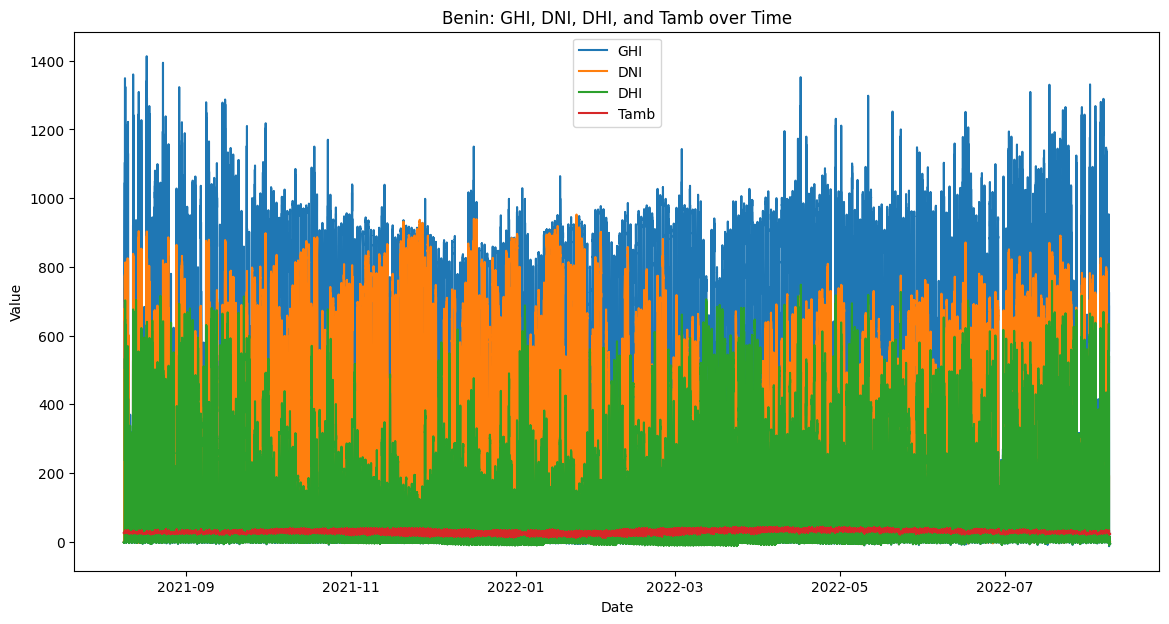

In [6]:
# Plot GHI, DNI, DHI, and Tamb for Benin
plot_time_series(benin, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Benin: GHI, DNI, DHI, and Tamb over Time')

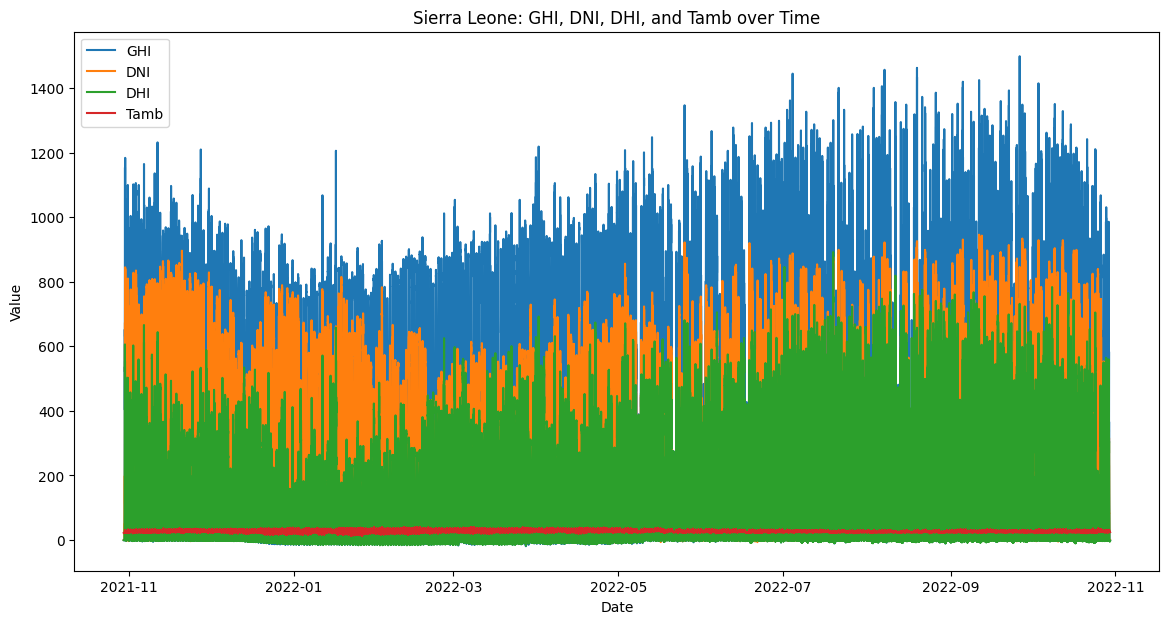

In [7]:
# Plot GHI, DNI, DHI, and Tamb for Sierra Leone
plot_time_series(sierraleone, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Sierra Leone: GHI, DNI, DHI, and Tamb over Time')

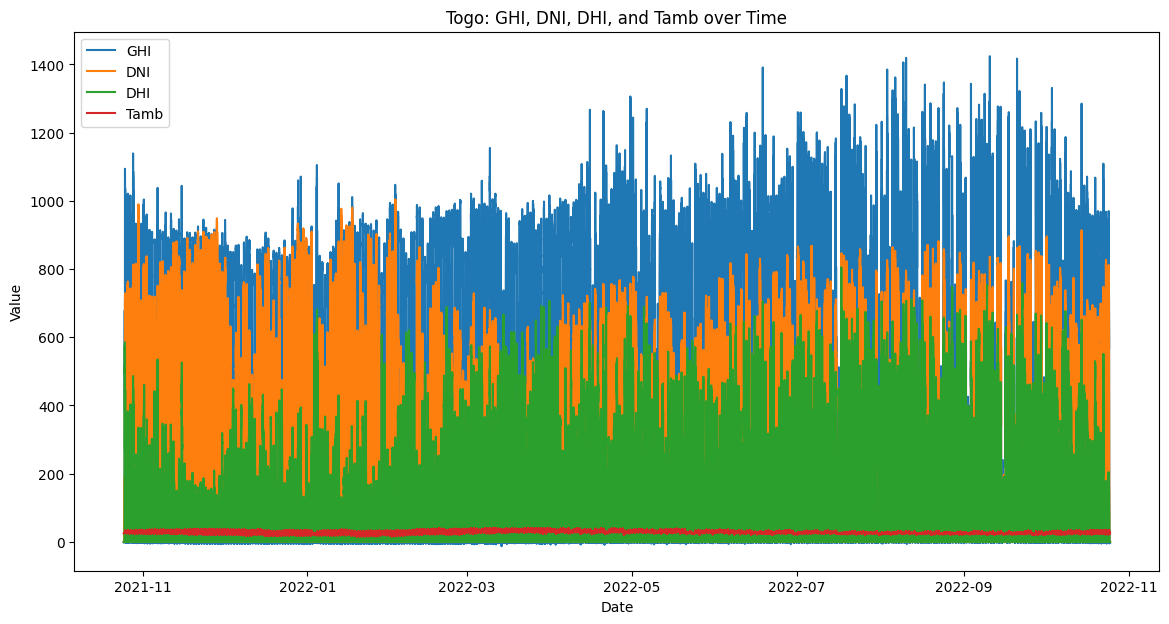

In [8]:
# Plot GHI, DNI, DHI, and Tamb for Togo
plot_time_series(togo, ['GHI', 'DNI', 'DHI', 'Tamb'], 'Togo: GHI, DNI, DHI, and Tamb over Time')

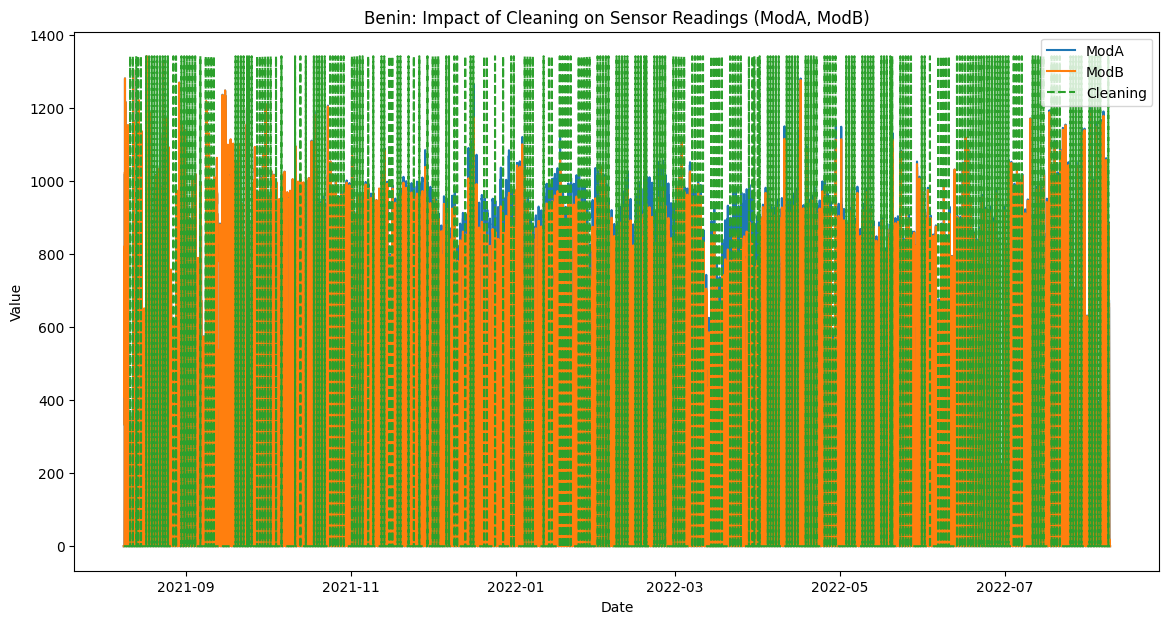

In [9]:
# Plot impact of cleaning on sensor readings for Benin
plot_cleaning_impact(benin, ['ModA', 'ModB'], 'Cleaning', 'Benin: Impact of Cleaning on Sensor Readings (ModA, ModB)')

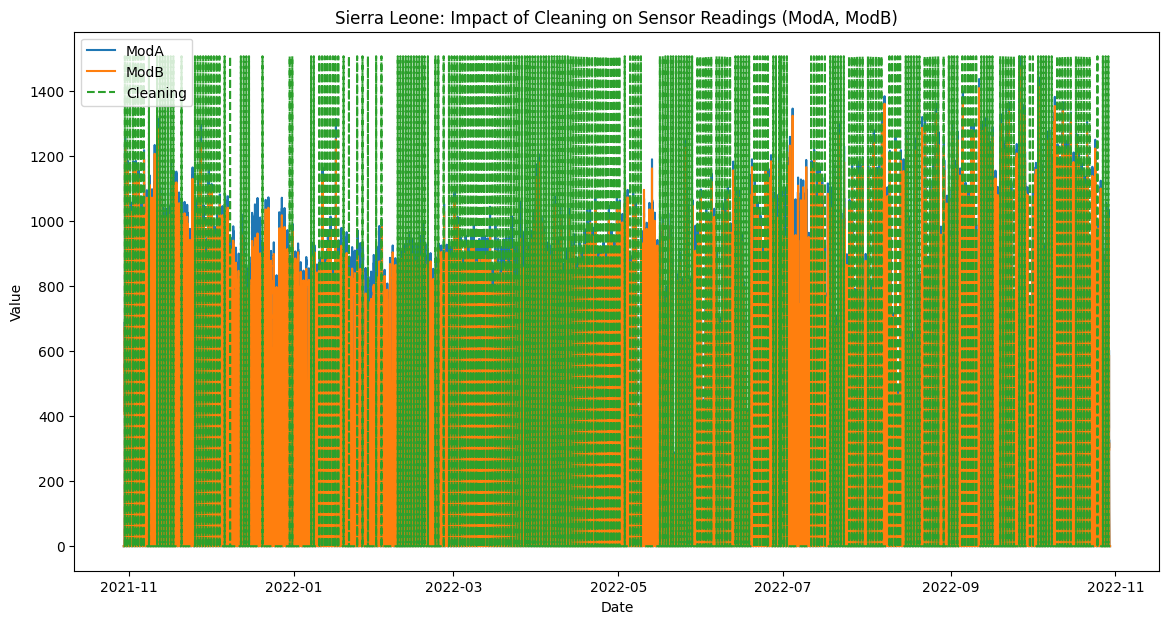

In [10]:
# Plot impact of cleaning on sensor readings for Sierra Leone
plot_cleaning_impact(sierraleone, ['ModA', 'ModB'], 'Cleaning', 'Sierra Leone: Impact of Cleaning on Sensor Readings (ModA, ModB)')

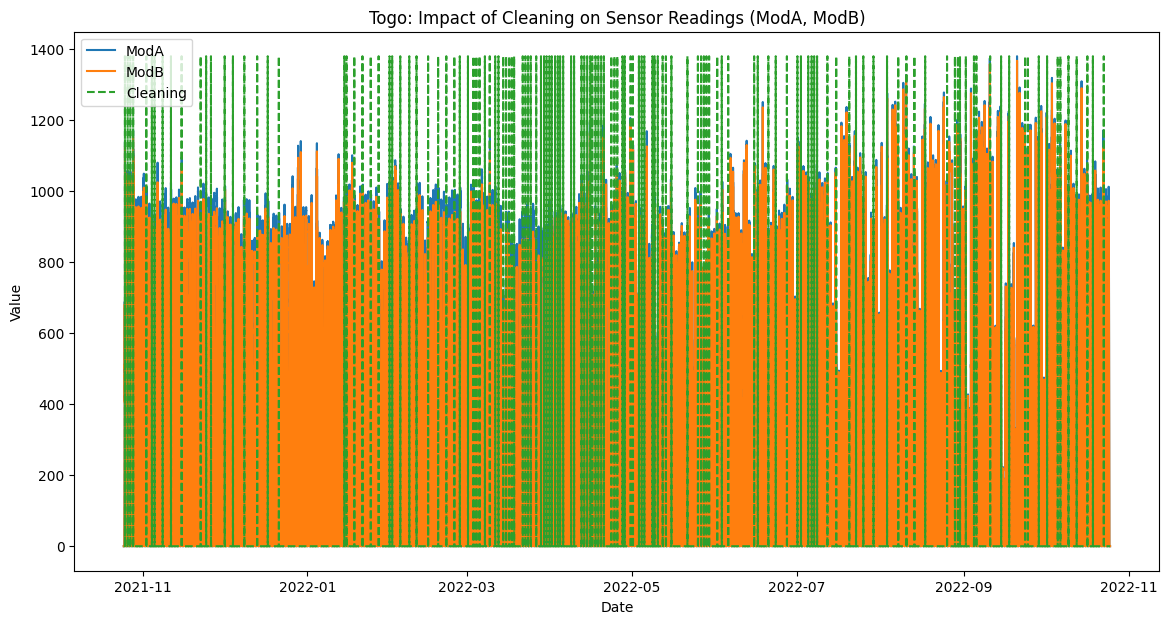

In [11]:
# Plot impact of cleaning on sensor readings for Togo
plot_cleaning_impact(togo, ['ModA', 'ModB'], 'Cleaning', 'Togo: Impact of Cleaning on Sensor Readings (ModA, ModB)')

## Conclusion

The above code performs an outlier detection analysis on sensor data from three different locations: Benin, Sierra Leone, and Togo. It identifies potential outliers in sensor readings (ModA and ModB) and wind speed data (WS and WSgust) using the Interquartile Range (IQR) method. The analysis helps in understanding the distribution of the data and highlights any data points that significantly deviate from the expected range. By identifying these outliers, the code provides insights into the quality of the data, which can later be used for further data cleaning or machine learning model preparation.